In [40]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #adjusts the configuration of the plots we will create

#Read in the data
df = pd.read_csv('listofmovies.csv')



In [41]:
#Let's look at the data

df.head()

budget                                 company country       director  \
0   8000000.0           Columbia Pictures Corporation     USA     Rob Reiner   
1  15000000.0                      Paramount Pictures     USA     Tony Scott   
2  18500000.0  Twentieth Century Fox Film Corporation     USA  James Cameron   
3   6000000.0                      Paramount Pictures     USA    John Hughes   
4   9000000.0                      Paramount Pictures     USA  Howard Deutch   

       genre        gross                      name rating    released  \
0  Adventure   52287414.0               Stand by Me      R  1986-08-22   
1     Action  179800601.0                   Top Gun     PG  1986-05-16   
2     Action   85160248.0                    Aliens      R  1986-07-18   
3     Comedy   70136369.0  Ferris Bueller's Day Off  PG-13  1986-06-11   
4     Comedy   40471663.0            Pretty in Pink  PG-13  1986-02-28   

   runtime  score               star         writer  year  
0       89    8.1        Wil Wheaton   Stephen King  1986  
1      110    6.9         Tom Cruise       Jim Cash  1986  
2      137    8.4   Sigourney Weaver  James Cameron  1986  
3      103    7.8  Matthew Broderick    John Hughes  1986  
4       96    6.8     Molly Ringwald    John Hughes  1986

In [42]:
#See if there's any missing data
#create for loop, loop through each column

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

budget - 0.0%
company - 0.0%
country - 0.0%
director - 0.0%
genre - 0.0%
gross - 0.0%
name - 0.0%
rating - 0.0%
released - 0.0%
runtime - 0.0%
score - 0.0%
star - 0.0%
writer - 0.0%
year - 0.0%


In [43]:
#Data types for our clumns
df.dtypes

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
writer       object
year          int64
dtype: object

In [44]:
#change column values to integer

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [86]:
df.head()

budget  company  country  director  genre      gross  name  rating  \
2903  245000000      574       37       468      0  936662225  2146       5   
2302  237000000      837       36       478      0  760507625   219       5   
1100  200000000      837       37       478      6  658672302  2852       5   
2916  150000000      846       37       207      0  652270625  1246       5   
2603  220000000      596       37       656      0  623357910  2276       5   

      released  runtime  score  star  writer  year  correct year  
2903      1636      136    8.1   236    1106  2015            29  
2302      1297      162    7.8   986     768  2009            23  
1100       643      194    7.8   699     768  1997            11  
2916      1606      124    7.0   203    1545  2015            29  
2603      1431      143    8.1   946    1010  2012            26

In [87]:
#Create new column showcasing the correct years
df['correct year'] = df['released'].astype(str).str[:4]
df.head()

budget  company  country  director  genre      gross  name  rating  \
2903  245000000      574       37       468      0  936662225  2146       5   
2302  237000000      837       36       478      0  760507625   219       5   
1100  200000000      837       37       478      6  658672302  2852       5   
2916  150000000      846       37       207      0  652270625  1246       5   
2603  220000000      596       37       656      0  623357910  2276       5   

      released  runtime  score  star  writer  year correct year  
2903      1636      136    8.1   236    1106  2015         1636  
2302      1297      162    7.8   986     768  2009         1297  
1100       643      194    7.8   699     768  1997          643  
2916      1606      124    7.0   203    1545  2015         1606  
2603      1431      143    8.1   946    1010  2012         1431

In [55]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [56]:
pd.set_option('display.max_rows', None)

In [57]:
#Check to see if there are any duplicates, and then drop them

df['company'].drop_duplicates().sort_values(ascending=False)

2422                                          micro_scope
1233                          Zucker Brothers Productions
1454                              Zentropa Entertainments
184                                  Zenith Entertainment
2191                                      Zazen Produções
334                                   Zanuck Company, The
255                           Zacharias-Buhai Productions
2175                           Young Hannibal Productions
2316                                          Yellow Bird
1257                                X-Filme Creative Pool
2722                              Worldview Entertainment
2612                                  Working Title Films
1700                                         Wiseau-Films
834                                         WingNut Films
2957                                       Wildgaze Films
2203                                           Wild Bunch
2012                      Wiedemann & Berg Filmproduktion
2685          

In [58]:
df

budget                                            company  \
2903  245000000                                          Lucasfilm   
2302  237000000             Twentieth Century Fox Film Corporation   
1100  200000000             Twentieth Century Fox Film Corporation   
2916  150000000                                 Universal Pictures   
2603  220000000                                     Marvel Studios   
2200  185000000                                       Warner Bros.   
3011  200000000                                          Lucasfilm   
3088  200000000                            Pixar Animation Studios   
1310  115000000                                          Lucasfilm   
2920  250000000                                     Marvel Studios   
2602  250000000                                       Warner Bros.   
1846  150000000                                         DreamWorks   
2742  130000000                                        Color Force   
2006  225000000                               Walt Disney Pictures   
2428  200000000                               Walt Disney Pictures   
2739  200000000                                     Marvel Studios   
3030  250000000                                     Marvel Studios   
2605   78000000                                          Lionsgate   
1605  139000000                      Columbia Pictures Corporation   
702    63000000                                 Universal Pictures   
2327  200000000                                         DreamWorks   
2701  150000000                      Walt Disney Animation Studios   
2502  125000000                                       Warner Bros.   
1710   94000000                            Pixar Animation Studios   
1920  113000000                                          Lucasfilm   
1702   94000000                                    New Line Cinema   
1839  200000000                      Columbia Pictures Corporation   
1836   30000000                                   Icon Productions   
3060   75000000                                 Universal Pictures   
2744   76000000                                 Universal Pictures   
3073  175000000                             Fairview Entertainment   
3015   58000000             Twentieth Century Fox Film Corporation   
2928  175000000                            Pixar Animation Studios   
2921  190000000                                 Universal Pictures   
2521  195000000                                 Paramount Pictures   
2830   58800000                                       Warner Bros.   
1606   94000000                                    New Line Cinema   
3027  150000000                               Walt Disney Pictures   
2846  125000000                                        Color Force   
2118  258000000                                  Columbia Pictures   
2955   74000000                         Illumination Entertainment   
2420  200000000                               Walt Disney Pictures   
2801  170000000                                     Marvel Studios   
3021  250000000                                       Warner Bros.   
802    55000000                                 Paramount Pictures   
3003  175000000                                Atlas Entertainment   
2164  160000000                               DreamWorks Animation   
2102  150000000                                         DreamWorks   
2211  140000000                                 Paramount Pictures   
1500  125000000                                       Warner Bros.   
2230  185000000                                 Paramount Pictures   
1502   93000000                                    New Line Cinema   
804    45000000                               Walt Disney Pictures   
2431  200000000                                 Paramount Pictures   
1624  115000000                                          Lucasfilm   
2111  300000000                               Walt Disney Pictures   
1001   75000000    

In [59]:
#My prediction: the more money they spend, the higher the gross revenue.
#So, budget has a high correlation
#Additionally, the better company brand name, the higher the gross revenue.
#So, company name has a high correlation as well.

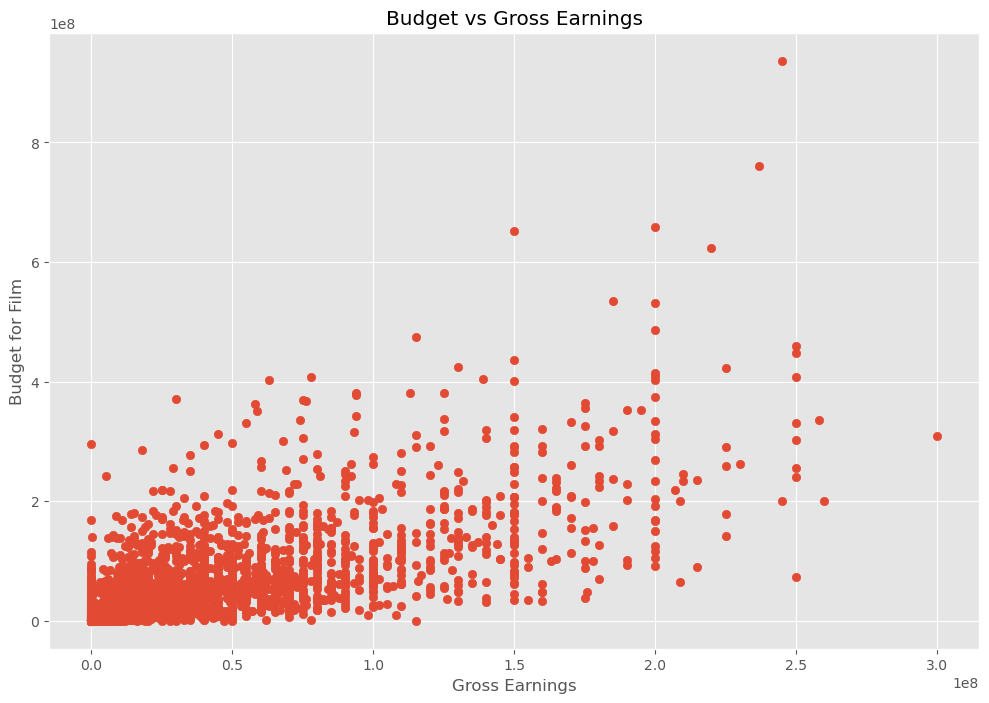

In [60]:
#Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y = df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')

plt.ylabel('Budget for Film')

plt.show()

In [61]:
df.head()

budget                                 company country  \
2903  245000000                               Lucasfilm     USA   
2302  237000000  Twentieth Century Fox Film Corporation      UK   
1100  200000000  Twentieth Century Fox Film Corporation     USA   
2916  150000000                      Universal Pictures     USA   
2603  220000000                          Marvel Studios     USA   

             director   genre      gross                          name rating  \
2903      J.J. Abrams  Action  936662225  Star Wars: The Force Awakens  PG-13   
2302    James Cameron  Action  760507625                        Avatar  PG-13   
1100    James Cameron   Drama  658672302                       Titanic  PG-13   
2916  Colin Trevorrow  Action  652270625                Jurassic World  PG-13   
2603      Joss Whedon  Action  623357910                  The Avengers  PG-13   

        released  runtime  score               star           writer  year  \
2903  2015-12-18      136    8.1       Daisy Ridley  Lawrence Kasdan  2015   
2302  2009-12-18      162    7.8    Sam Worthington    James Cameron  2009   
1100  1997-12-19      194    7.8  Leonardo DiCaprio    James Cameron  1997   
2916  2015-06-12      124    7.0        Chris Pratt       Rick Jaffa  2015   
2603  2012-05-04      143    8.1  Robert Downey Jr.      Joss Whedon  2012   

     correct year  
2903         2015  
2302         2009  
1100         1997  
2916         2015  
2603         2012

<AxesSubplot:xlabel='budget', ylabel='gross'>

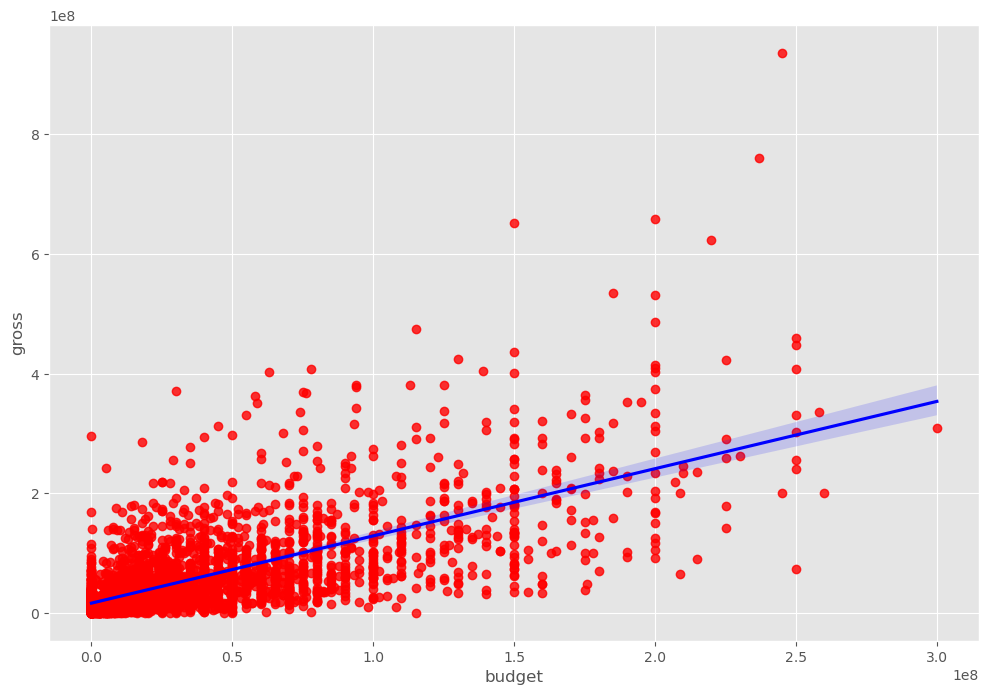

In [63]:
# Plot budget vs. gross data using seaborn

sns.regplot(x = 'budget', y = 'gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [64]:
#at a glance, we can tell that budget and gross are correlated
#Looking at correlation more specifically,

In [69]:
df.corr(method='pearson') #pearson, kendall, spearman 

budget     gross   runtime     score      year
budget   1.000000  0.682588  0.309652  0.019061  0.374904
gross    0.682588  1.000000  0.238183  0.171825  0.246975
runtime  0.309652  0.238183  1.000000  0.386864  0.127864
score    0.019061  0.171825  0.386864  1.000000  0.109251
year     0.374904  0.246975  0.127864  0.109251  1.000000

In [70]:
#High correlation between budget and gross
#My prediction has been affirmed

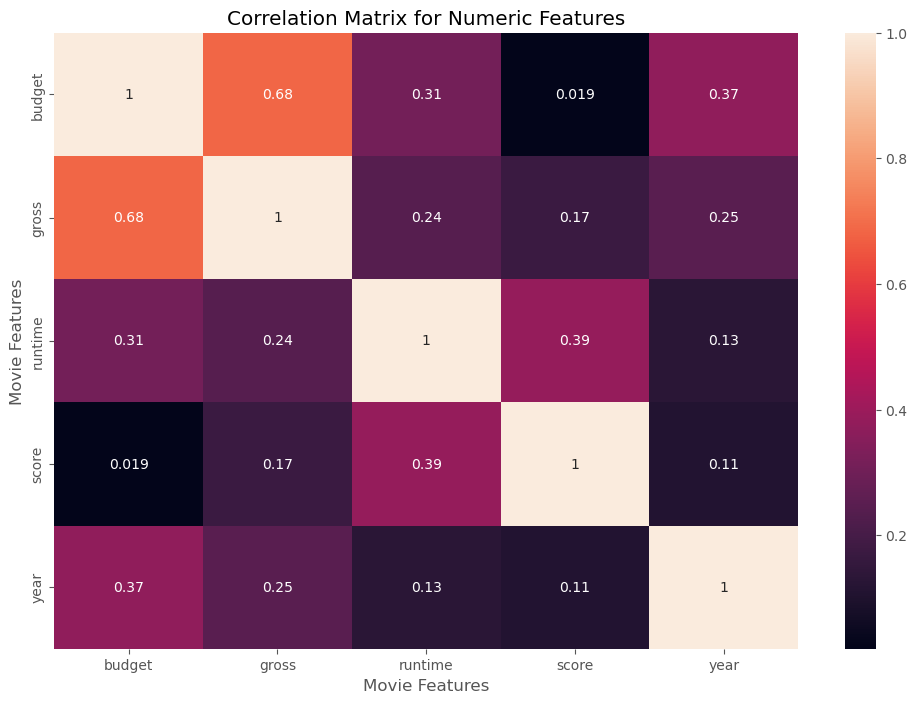

In [73]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [74]:
#bright colors indicate higher correlation, darker colors indicate lower correlation

In [75]:
#Next, we can examine company information

In [76]:
df.head()

budget                                 company country  \
2903  245000000                               Lucasfilm     USA   
2302  237000000  Twentieth Century Fox Film Corporation      UK   
1100  200000000  Twentieth Century Fox Film Corporation     USA   
2916  150000000                      Universal Pictures     USA   
2603  220000000                          Marvel Studios     USA   

             director   genre      gross                          name rating  \
2903      J.J. Abrams  Action  936662225  Star Wars: The Force Awakens  PG-13   
2302    James Cameron  Action  760507625                        Avatar  PG-13   
1100    James Cameron   Drama  658672302                       Titanic  PG-13   
2916  Colin Trevorrow  Action  652270625                Jurassic World  PG-13   
2603      Joss Whedon  Action  623357910                  The Avengers  PG-13   

        released  runtime  score               star           writer  year  \
2903  2015-12-18      136    8.1       Daisy Ridley  Lawrence Kasdan  2015   
2302  2009-12-18      162    7.8    Sam Worthington    James Cameron  2009   
1100  1997-12-19      194    7.8  Leonardo DiCaprio    James Cameron  1997   
2916  2015-06-12      124    7.0        Chris Pratt       Rick Jaffa  2015   
2603  2012-05-04      143    8.1  Robert Downey Jr.      Joss Whedon  2012   

     correct year  
2903         2015  
2302         2009  
1100         1997  
2916         2015  
2603         2012

In [77]:
df_numerized = df

#use a for loop 

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

budget  company  country  director  genre      gross  name  rating  \
2903  245000000      574       37       468      0  936662225  2146       5   
2302  237000000      837       36       478      0  760507625   219       5   
1100  200000000      837       37       478      6  658672302  2852       5   
2916  150000000      846       37       207      0  652270625  1246       5   
2603  220000000      596       37       656      0  623357910  2276       5   
2200  185000000      869       37       200      0  534858444  2366       5   
3011  200000000      574       37       366      0  532177324  1900       5   
3088  200000000      686       37        55      2  486295561   834       4   
1310  115000000      574       37       392      0  474544677  2143       4   
2920  250000000      596       37       656      0  459005868   220       5   
2602  250000000      869       36       200      0  448139099  2367       5   
1846  150000000      321       37        47      2  436471036  2032       4   
2742  130000000      255       37       345      0  424668047  2495       5   
2006  225000000      868       37       408      0  423315812  1740       5   
2428  200000000      868       37       722      2  415004880  2868       0   
2739  200000000      596        7      1108      0  409013994  1181       5   
3030  250000000      596       37        74      0  408084349   415       5   
2605   78000000      565       37       375      1  408010692  2494       5   
1605  139000000      257       37      1081      0  403706375  2114       5   
702    63000000      846       37      1166      1  402453882  1244       5   
2327  200000000      321       37       813      0  402111870  2877       5   
2701  150000000      865       37       177      2  400738009   897       4   
2502  125000000      869       37       276      1  381011219  1016       5   
1710   94000000      686       37        55      2  380843261   836       0   
1920  113000000      574       37       392      0  380262555  2145       5   
1702   94000000      632       37       948      1  377845905  2574       5   
1839  200000000      257       37      1081      0  373585825  2115       5   
1836   30000000      484       37       807      6  370782930  2645       6   
3060   75000000      846       20       185      2  368384330  1311       4   
2744   76000000      846       37       970      2  368061265   624       4   
3073  175000000      363       36       625      1  364001123  2526       4   
3015   58000000      837       37      1206      0  363070709   598       6   
2928  175000000      686       37       932      2  356461711  1163       4   
2921  190000000      846       37       495      0  353007020   903       5   
2521  195000000      668       37       813      0  352390543  2876       5   
2830   58800000      869       37       204      0  350126372   159       6   
1606   94000000      632       37       948      1  342551365  2575       5   
3027  150000000      868       37       154      2  341268248  3075       4   
2846  125000000      255       37       345      0  337135885  2496       5   
2118  258000000      256       37      1081      0  336530303  2116       5   
2955   74000000      485       37       709      2  336045770  1506       4   
2420  200000000      868       37      1201      1  334191110   129       4   
2801  170000000      596       37       482      0  333176600   979       5   
3021  250000000      869       37      1290      0  330360194   258       5   
802    55000000      668       37      1045      4  330252182   864       5   
3003  175000000       96       37       243      0  325100054  2181       5   
2164  160000000      322       37       182      2  320706665  2034       4   
2102  150000000      321       37       813      0  319071806  2874       5   
2211  140000000      668       37       625      0  318412101  1179       5   
1500  125000000      869       36       178      1  3175755

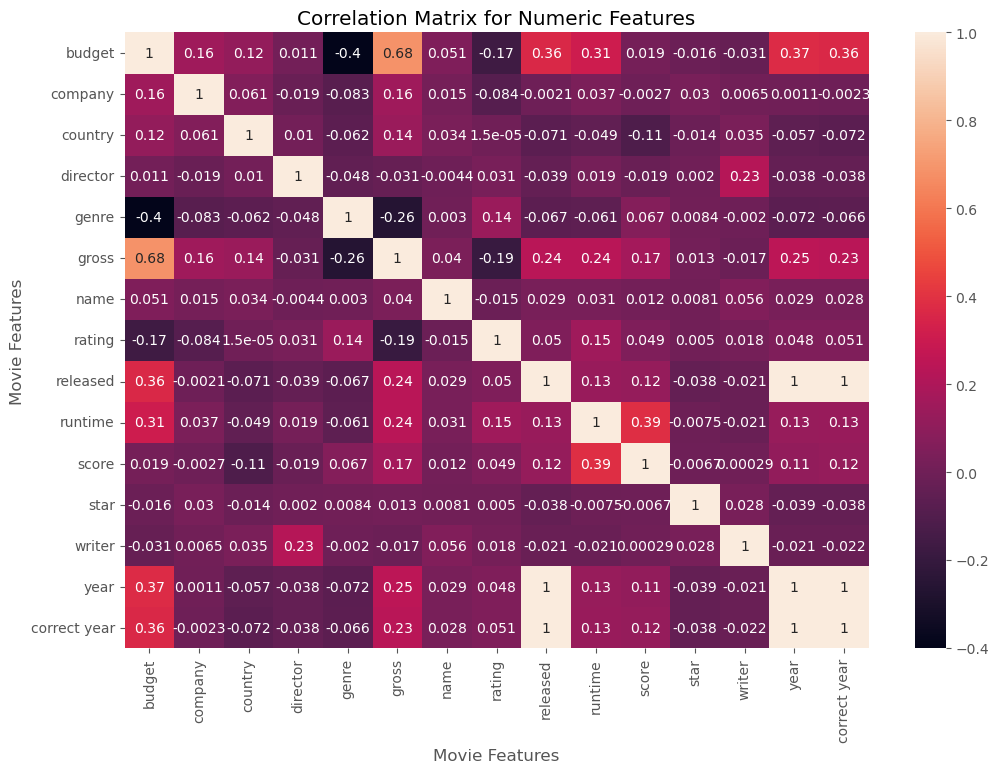

In [78]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [79]:
#Some insights: budget, ratings, 

In [80]:
df_numerized.corr()

budget   company   country  director     genre     gross  \
budget        1.000000  0.157083  0.118863  0.011052 -0.401052  0.682588   
company       0.157083  1.000000  0.061089 -0.018730 -0.083068  0.156013   
country       0.118863  0.061089  1.000000  0.010291 -0.062478  0.138064   
director      0.011052 -0.018730  0.010291  1.000000 -0.048337 -0.031221   
genre        -0.401052 -0.083068 -0.062478 -0.048337  1.000000 -0.263051   
gross         0.682588  0.156013  0.138064 -0.031221 -0.263051  1.000000   
name          0.051049  0.014947  0.034133 -0.004434  0.002989  0.039578   
rating       -0.171070 -0.083646  0.000015  0.030589  0.136055 -0.191666   
released      0.364690 -0.002053 -0.070944 -0.038601 -0.066830  0.237240   
runtime       0.309652  0.037491 -0.049398  0.018846 -0.061327  0.238183   
score         0.019061 -0.002730 -0.113568 -0.018591  0.067234  0.171825   
star         -0.016357  0.030054 -0.014146  0.001973  0.008380  0.013428   
writer       -0.031269  0.006527  0.035367  0.227905 -0.001986 -0.017184   
year          0.374904  0.001121 -0.057044 -0.037946 -0.072299  0.246975   
correct year  0.361727 -0.002346 -0.072135 -0.038486 -0.065987  0.234971   

                  name    rating  released   runtime     score      star  \
budget        0.051049 -0.171070  0.364690  0.309652  0.019061 -0.016357   
company       0.014947 -0.083646 -0.002053  0.037491 -0.002730  0.030054   
country       0.034133  0.000015 -0.070944 -0.049398 -0.113568 -0.014146   
director     -0.004434  0.030589 -0.038601  0.018846 -0.018591  0.001973   
genre         0.002989  0.136055 -0.066830 -0.061327  0.067234  0.008380   
gross         0.039578 -0.191666  0.237240  0.238183  0.171825  0.013428   
name          1.000000 -0.014934  0.029409  0.031283  0.011649  0.008144   
rating       -0.014934  1.000000  0.049616  0.153396  0.048781  0.004985   
released      0.029409  0.049616  1.000000  0.133181  0.120931 -0.037896   
runtime       0.031283  0.153396  0.133181  1.000000  0.386864 -0.007494   
score         0.011649  0.048781  0.120931  0.386864  1.000000 -0.006750   
star          0.008144  0.004985 -0.037896 -0.007494 -0.006750  1.000000   
writer        0.055729  0.017506 -0.021203 -0.020986  0.000293  0.027501   
year          0.028571  0.048356  0.996873  0.127864  0.109251 -0.039222   
correct year  0.027662  0.051107  0.999434  0.130664  0.119861 -0.038432   

                writer      year  correct year  
budget       -0.031269  0.374904      0.361727  
company       0.006527  0.001121     -0.002346  
country       0.035367 -0.057044     -0.072135  
director      0.227905 -0.037946     -0.038486  
genre        -0.001986 -0.072299     -0.065987  
gross        -0.017184  0.246975      0.234971  
name          0.055729  0.028571      0.027662  
rating        0.017506  0.048356      0.051107  
released     -0.021203  0.996873      0.999434  
runtime      -0.020986  0.127864      0.130664  
score         0.000293  0.109251      0.119861  
star          0.027501 -0.039222     -0.038432  
writer        1.000000 -0.021123     -0.021537  
year         -0.021123  1.000000      0.996846  
correct year -0.021537  0.996846      1.000000

In [81]:
#different ways of showing the correlations

correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

budget        budget          1.000000
              company         0.157083
              country         0.118863
              director        0.011052
              genre          -0.401052
              gross           0.682588
              name            0.051049
              rating         -0.171070
              released        0.364690
              runtime         0.309652
              score           0.019061
              star           -0.016357
              writer         -0.031269
              year            0.374904
              correct year    0.361727
company       budget          0.157083
              company         1.000000
              country         0.061089
              director       -0.018730
              genre          -0.083068
              gross           0.156013
              name            0.014947
              rating         -0.083646
              released       -0.002053
              runtime         0.037491
              score      

In [82]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre         budget         -0.401052
budget        genre          -0.401052
genre         gross          -0.263051
gross         genre          -0.263051
              rating         -0.191666
rating        gross          -0.191666
              budget         -0.171070
budget        rating         -0.171070
country       score          -0.113568
score         country        -0.113568
rating        company        -0.083646
company       rating         -0.083646
genre         company        -0.083068
company       genre          -0.083068
genre         year           -0.072299
year          genre          -0.072299
correct year  country        -0.072135
country       correct year   -0.072135
released      country        -0.070944
country       released       -0.070944
genre         released       -0.066830
released      genre          -0.066830
correct year  genre          -0.065987
genre         correct year   -0.065987
              country        -0.062478
country       genre      

In [85]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

gross         budget          0.682588
budget        gross           0.682588
correct year  year            0.996846
year          correct year    0.996846
released      year            0.996873
year          released        0.996873
released      correct year    0.999434
correct year  released        0.999434
budget        budget          1.000000
rating        rating          1.000000
writer        writer          1.000000
star          star            1.000000
score         score           1.000000
runtime       runtime         1.000000
released      released        1.000000
name          name            1.000000
gross         gross           1.000000
genre         genre           1.000000
director      director        1.000000
country       country         1.000000
company       company         1.000000
year          year            1.000000
correct year  correct year    1.000000
dtype: float64

In [ ]:
#Our hypothesis that company brand was positively correlated to gross earnings isn't quite correct
#Votes and budget have the highest correlation to gross earnings